In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Second cell - Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
def load_mfcc_data(base_path, songs_per_folder=20):
    """
    Load MFCC data from CSV files
    Args:
        base_path: Path to data directory
        songs_per_folder: Number of songs to load from each folder
    """
    X = []  # Features
    y = []  # Labels

    # Dictionary to map folder names to numeric labels
    folders = ['asha', 'bhaavgeet mfcc', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        print(f"Processing folder: {folder}")

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            try:
                # Read CSV file
                data = pd.read_csv(file_path, header=None)
                mfcc_features = data.values[:20, :]  # First 20 rows directly

                # Calculate basic statistical features
                features = np.concatenate([
                    np.mean(mfcc_features, axis=1),
                    np.std(mfcc_features, axis=1),
                    np.min(mfcc_features, axis=1),
                    np.max(mfcc_features, axis=1),
                    np.median(mfcc_features, axis=1),
                ])

                X.append(features)
                y.append(label_dict[folder])

            except Exception as e:
                print(f"Error processing file {file}: {str(e)}")

    return np.array(X), np.array(y)


In [8]:
BASE_PATH = '/content/drive/MyDrive/neural_data'
print("Loading data...")
X, y = load_mfcc_data(BASE_PATH, songs_per_folder=20)
print(f"Loaded data shape: {X.shape}, {y.shape}")

# Fifth cell - Preprocess data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sixth cell - Build and train a neural network
print("\nTraining Neural Network...")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 categories
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.2)

# Seventh cell - Evaluate the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\nNeural Network Results:")
print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

# Get predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Loading data...
Processing folder: asha
Processing folder: bhaavgeet mfcc
Processing folder: Jana Gana Mana
Processing folder: kk_mfcc
Processing folder: lavani
Processing folder: mj
Loaded data shape: (120, 100), (120,)

Training Neural Network...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 684ms/step - accuracy: 0.1699 - loss: 2.0859 - val_accuracy: 0.2000 - val_loss: 1.7946
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1464 - loss: 2.0498 - val_accuracy: 0.3500 - val_loss: 1.7283
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1891 - loss: 1.8272 - val_accuracy: 0.3000 - val_loss: 1.7142
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2979 - loss: 1.5939 - val_accuracy: 0.3000 - val_loss: 1.6929
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4094 - loss: 1.5351 - val_accuracy: 0.3000 - val_loss: 1.6770
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3973 - loss: 1.5777 - val_accuracy: 0.4500 - val_loss: 1.6541
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4060 - loss: 1.4622 - val_accuracy: 0.4000 - val_loss: 1.6378
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5192 - loss: 1.3717 - val_accuracy: 0.4500 - val_loss: 1.6021
Epoch 9/30
5/5 ━

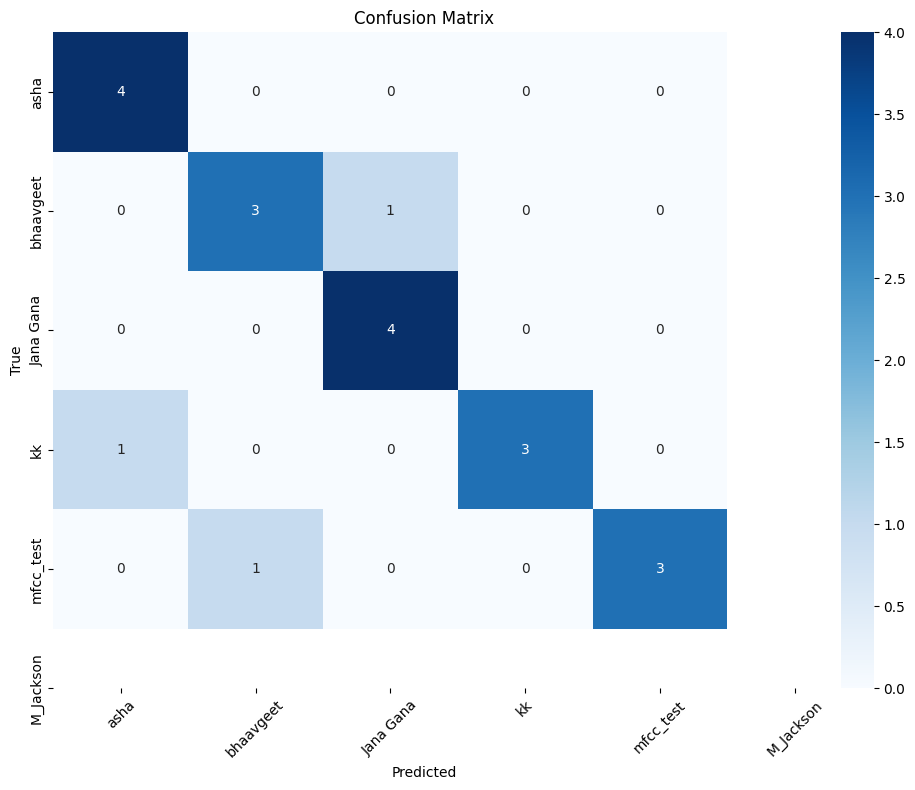

In [5]:
# Eighth cell - Visualize results
# Plot confusion matrix
folders = ['asha', 'bhaavgeet', 'Jana Gana', 'kk', 'mfcc_test', 'M_Jackson']
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
BASE_PATH = '/content/drive/MyDrive/neural_data'
print("Loading data...")
X, y = load_mfcc_data(BASE_PATH, songs_per_folder=40)
print(f"Loaded data shape: {X.shape}, {y.shape}")

# Fifth cell - Preprocess data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sixth cell - Build and train a neural network
print("\nTraining Neural Network...")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 categories
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.2)

# Seventh cell - Evaluate the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\nNeural Network Results:")
print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

# Get predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Loading data...
Processing folder: asha
Processing folder: bhaavgeet mfcc
Processing folder: Jana Gana Mana
Processing folder: kk
Processing folder: lavani
Processing folder: mj
Loaded data shape: (190, 100), (190,)

Training Neural Network...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 990ms/step - accuracy: 0.2382 - loss: 2.2833 - val_accuracy: 0.3226 - val_loss: 1.8364
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2229 - loss: 2.0773 - val_accuracy: 0.3871 - val_loss: 1.6067
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3190 - loss: 1.6664 - val_accuracy: 0.4516 - val_loss: 1.4559
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2706 - loss: 1.5683 - val_accuracy: 0.4839 - val_loss: 1.3414
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4016 - loss: 1.4355 - val_accuracy: 0.5484 - val_loss: 1.2563
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5072 - loss: 1.2080 - val_accuracy: 0.5806 - val_loss: 1.2027
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5710 - loss: 1.1772 - val_accuracy: 0.5484 - val_loss: 1.1574
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6183 - loss: 1.0118 - val_accuracy: 0.5484 - val_loss: 1.1043
Epoch 9/30
8/8 ━

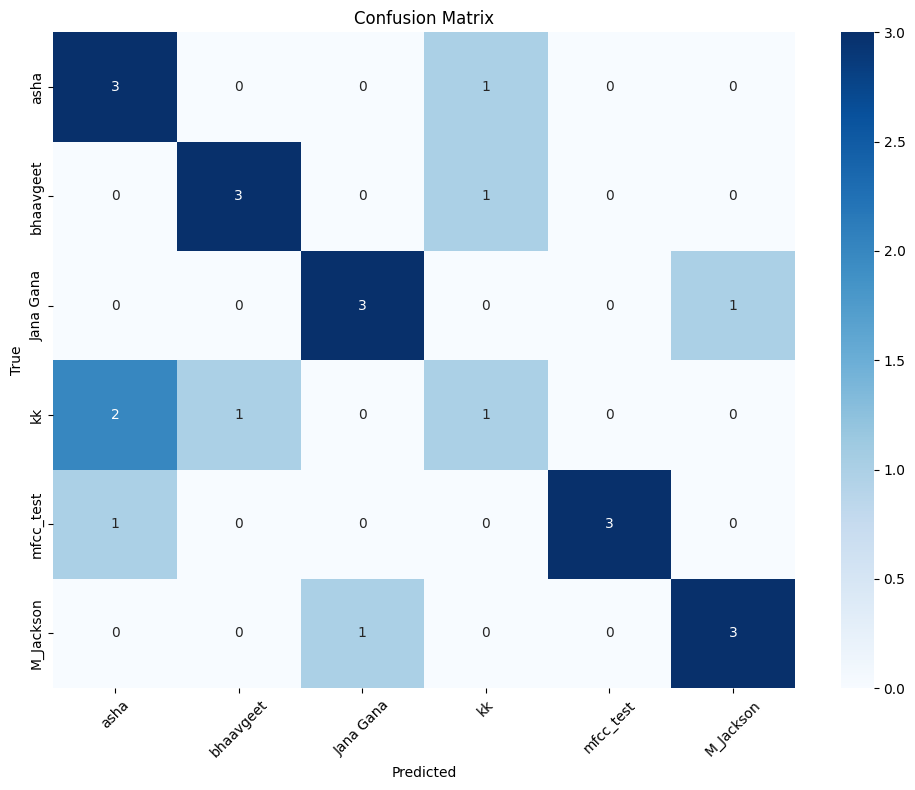

In [9]:
# Eighth cell - Visualize results
# Plot confusion matrix
folders = ['asha', 'bhaavgeet', 'Jana Gana', 'kk', 'mfcc_test', 'M_Jackson']
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load training data
def load_training_data(base_path, songs_per_folder=30):
    """
    Load MFCC data from training CSV files with an initial sequential row.
    Args:
        base_path: Path to training data directory.
        songs_per_folder: Max number of files to load from each folder.
    """
    X, y = [], []
    folders = ['asha', 'bhaavgeet', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None)
            print(file_path)

            # Ignore first sequential row and use the remaining 20 rows of MFCCs
            mfcc_features = data.iloc[1:21, :].values

            # Calculate statistical features from MFCC rows
            # features = np.concatenate([
            #     np.mean(mfcc_features, axis=1),
            #     np.std(mfcc_features, axis=1),
            #     np.min(mfcc_features, axis=1),
            #     np.max(mfcc_features, axis=1),
            #     np.median(mfcc_features, axis=1),
            #     np.ptp(mfcc_features, axis=1)  # Peak-to-peak range
            # ])
            features = np.concatenate([
                np.mean(mfcc_features, axis=1),
                np.std(mfcc_features, axis=1),
                np.min(mfcc_features, axis=1),
                np.max(mfcc_features, axis=1),
                # np.median(mfcc_features, axis=1),
                np.ptp(mfcc_features, axis=1),
                skew(mfcc_features, axis=1),
                kurtosis(mfcc_features, axis=1),
                np.sqrt(np.mean(mfcc_features**2, axis=1))  # Calculate mean first, then sqrt
    ])


            X.append(features)
            y.append(label_dict[folder])

    return np.array(X), np.array(y)

# Function to load prediction data
def load_prediction_data(file_path):
    """
    Load MFCC data from prediction CSV files (without an initial sequential row).
    Args:
        file_path: Path to the CSV file.
    """
    data = pd.read_csv(file_path, header=None)
    mfcc_features = data.values  # Directly use all 20 rows

    # Extract statistical features for consistency with training data
    features = np.concatenate([
        np.mean(mfcc_features, axis=1),
        np.std(mfcc_features, axis=1),
        np.min(mfcc_features, axis=1),
        np.max(mfcc_features, axis=1),
        # np.median(mfcc_features, axis=1),
        np.ptp(mfcc_features, axis=1),
        skew(mfcc_features, axis=1),
        kurtosis(mfcc_features, axis=1),
        np.sqrt(np.mean(mfcc_features**2, axis=1))  # Calculate mean first, then sqrt
    ])

    return features

# Set paths and load training data
BASE_PATH = '/content/drive/MyDrive/neural_data'
X, y = load_training_data(BASE_PATH)

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a neural network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate model
train_accuracy = mlp.score(X_train_scaled, y_train)
val_accuracy = mlp.score(X_val_scaled, y_val)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

# Classification report and confusion matrix
y_val_pred = mlp.predict(X_val_scaled)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))



/content/drive/MyDrive/neural_data/asha/Aage Bhi Jaane Na - Waqt (1965) 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaiye Meharban - Howrah Bridge 1958 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Ki Raat Koi Aane Ko Hai - Anamika 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Koi Pyar Se - Sawan Ki Ghata 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Qayamat Ho Gai - Qayamat 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaja Aaja Sanam Rakhi Aur Hathkadi 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Huzoor Tumko - Kismet 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Na Gale Lag Jao Na - Mere Jeevan Saathi 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Yaro Gao - Hawas 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaya Hai Mausam Suhana - Sati Pareeksha 1957 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Ab Jo Mile Hai To - Caravan 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Ang Lag Ja

NameError: name 'folders' is not defined

<Figure size 800x600 with 0 Axes>

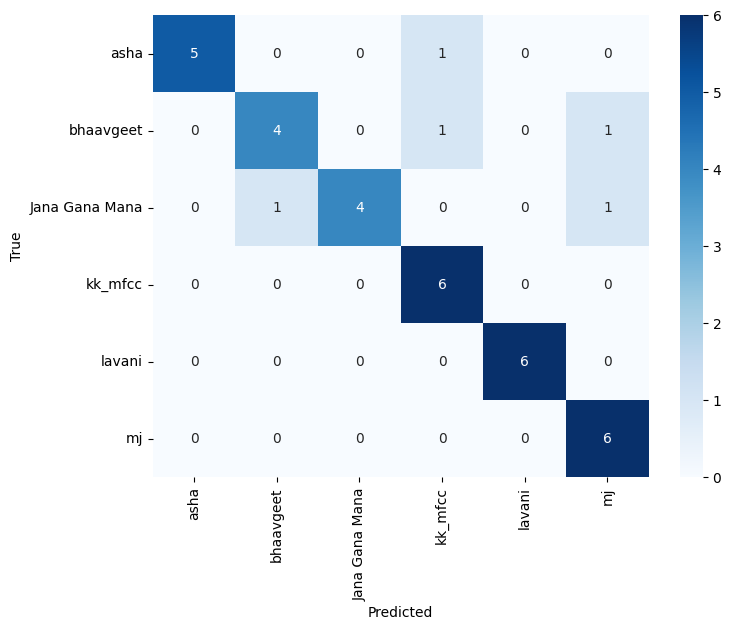

In [34]:
# Confusion matrix visualization
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_dict, yticklabels=label_dict)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
PREDICTION_PATH = '/content/drive/MyDrive/neural_data/MFCC-files-v2'
pred_files = [f for f in os.listdir(PREDICTION_PATH) if f.endswith('.csv')]

# Get the unique class labels from your training data
unique_labels = np.unique(y)

# Create a reverse mapping from numerical labels to folder names
reverse_label_dict = {label: folder for folder, label in label_dict.items()}

for file in pred_files:
    file_path = os.path.join(PREDICTION_PATH, file)
    features = load_prediction_data(file_path)
    features_scaled = scaler.transform([features])
    prediction = mlp.predict(features_scaled)

    # Ensure the prediction is within the valid range of labels
    predicted_label = prediction[0]
    if predicted_label in unique_labels:
        predicted_folder = reverse_label_dict[predicted_label]
        print(f"Prediction for {file}: {predicted_folder}")
    else:
        print(f"Prediction for {file}: Unknown (label {predicted_label} not in training data)")

Prediction for 73.csv: Jana Gana Mana
Prediction for 37.csv: bhaavgeet
Prediction for 1.csv: Jana Gana Mana
Prediction for 2.csv: kk_mfcc
Prediction for 104.csv: bhaavgeet
Prediction for 107.csv: asha
Prediction for 108.csv: Jana Gana Mana
Prediction for 11.csv: lavani
Prediction for 112.csv: asha
Prediction for 113.csv: kk_mfcc
Prediction for 13.csv: asha
Prediction for 14.csv: bhaavgeet
Prediction for 16.csv: Jana Gana Mana
Prediction for 17.csv: kk_mfcc
Prediction for 21.csv: asha
Prediction for 22.csv: lavani
Prediction for 24.csv: bhaavgeet
Prediction for 27.csv: bhaavgeet
Prediction for 31.csv: Jana Gana Mana
Prediction for 32.csv: bhaavgeet
Prediction for 33.csv: asha
Prediction for 35.csv: bhaavgeet
Prediction for 39.csv: asha
Prediction for 41.csv: asha
Prediction for 42.csv: asha
Prediction for 43.csv: asha
Prediction for 48.csv: kk_mfcc
Prediction for 49.csv: asha
Prediction for 54.csv: bhaavgeet
Prediction for 55.csv: bhaavgeet
Prediction for 56.csv: asha
Prediction for 57.

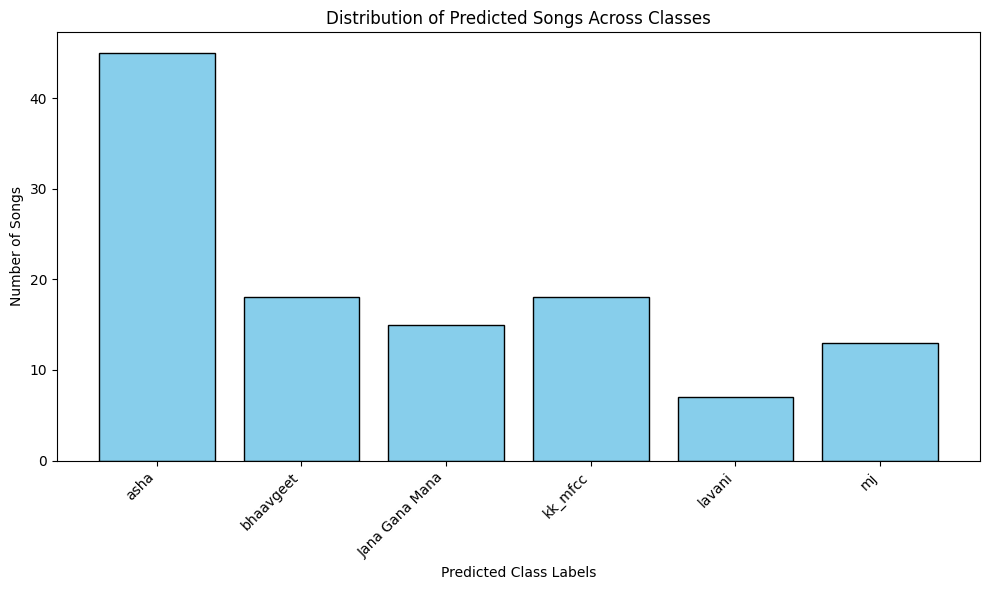

In [39]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for loading and preprocessing data, training the model, etc.) ...

PREDICTION_PATH = '/content/drive/MyDrive/neural_data/MFCC-files-v2'
pred_files = [f for f in os.listdir(PREDICTION_PATH) if f.endswith('.csv')]

# Get the unique class labels from your training data
unique_labels = np.unique(y)

# Create a reverse mapping from numerical labels to folder names
reverse_label_dict = {label: folder for folder, label in label_dict.items()}

predicted_labels = []  # Store the predicted labels for all files

for file in pred_files:
    file_path = os.path.join(PREDICTION_PATH, file)
    features = load_prediction_data(file_path)
    features_scaled = scaler.transform([features])
    prediction = mlp.predict(features_scaled)

    # Ensure the prediction is within the valid range of labels
    predicted_label = prediction[0]
    if predicted_label in unique_labels:
        predicted_labels.append(predicted_label)
    else:
        print(f"Prediction for {file}: Unknown (label {predicted_label} not in training data)")

# Visualization of Predicted Song Distribution
unique_predicted_labels, predicted_counts = np.unique(predicted_labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_predicted_labels, predicted_counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Songs Across Classes')
plt.xlabel('Predicted Class Labels')
plt.ylabel('Number of Songs')
plt.xticks(unique_predicted_labels, [reverse_label_dict[label] for label in unique_predicted_labels], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ... (Rest of your code) ...

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load training data
def load_training_data(base_path, songs_per_folder=30):
    """
    Load MFCC data from training CSV files with an initial sequential row.
    Args:
        base_path: Path to training data directory.
        songs_per_folder: Max number of files to load from each folder.
    """
    X, y = [], []
    folders = ['asha', 'bhaavgeet', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None)
            print(file_path)

            # Ignore first sequential row and use the remaining 20 rows of MFCCs
            mfcc_features = data.iloc[1:21, :].values

            # Calculate statistical features from MFCC rows
            features = np.concatenate([
                np.mean(mfcc_features, axis=1),
                np.std(mfcc_features, axis=1),
                np.min(mfcc_features, axis=1),
                np.max(mfcc_features, axis=1),
                np.median(mfcc_features, axis=1),
                np.ptp(mfcc_features, axis=1)  # Peak-to-peak range
            ])
    #         features = np.concatenate([
    #             np.mean(mfcc_features, axis=1),
    #             np.std(mfcc_features, axis=1),
    #             np.min(mfcc_features, axis=1),
    #             np.max(mfcc_features, axis=1),
    #             # np.median(mfcc_features, axis=1),
    #             np.ptp(mfcc_features, axis=1),
    #             skew(mfcc_features, axis=1),
    #             kurtosis(mfcc_features, axis=1),
    #             np.sqrt(np.mean(mfcc_features**2, axis=1))  # Calculate mean first, then sqrt
    # ])


            X.append(features)
            y.append(label_dict[folder])

    return np.array(X), np.array(y)

# Function to load prediction data
def load_prediction_data(file_path):
    """
    Load MFCC data from prediction CSV files (without an initial sequential row).
    Args:
        file_path: Path to the CSV file.
    """
    data = pd.read_csv(file_path, header=None)
    mfcc_features = data.values  # Directly use all 20 rows

    # Extract statistical features for consistency with training data
    features = np.concatenate([
        np.mean(mfcc_features, axis=1),
        np.std(mfcc_features, axis=1),
        np.min(mfcc_features, axis=1),
        np.max(mfcc_features, axis=1),
        np.median(mfcc_features, axis=1),
        np.ptp(mfcc_features, axis=1)  # Peak-to-peak range
    ])

    return features

# Set paths and load training data
BASE_PATH = '/content/drive/MyDrive/neural_data'
X, y = load_training_data(BASE_PATH)

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a neural network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate model
train_accuracy = mlp.score(X_train_scaled, y_train)
val_accuracy = mlp.score(X_val_scaled, y_val)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

# Classification report and confusion matrix
y_val_pred = mlp.predict(X_val_scaled)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))



In [12]:
PREDICTION_PATH = '/content/drive/MyDrive/neural_data/MFCC-files-v2'
pred_files = [f for f in os.listdir(PREDICTION_PATH) if f.endswith('.csv')]

for file in pred_files:
    file_path = os.path.join(PREDICTION_PATH, file)
    features = load_prediction_data(file_path)
    features_scaled = scaler.transform([features])
    prediction = mlp.predict(features_scaled)
    print(f"Prediction for {file}: {folders[prediction[0]]}")


Prediction for 108.csv: Jana Gana
Prediction for 55.csv: bhaavgeet
Prediction for 101.csv: asha
Prediction for 3.csv: M_Jackson
Prediction for 64.csv: mfcc_test
Prediction for 62.csv: asha
Prediction for 59.csv: kk
Prediction for 69.csv: mfcc_test
Prediction for 17.csv: Jana Gana
Prediction for 84.csv: kk
Prediction for 60.csv: asha
Prediction for 18.csv: kk
Prediction for 35.csv: asha
Prediction for 92.csv: Jana Gana
Prediction for 95.csv: asha
Prediction for 80.csv: asha
Prediction for 56.csv: asha
Prediction for 10.csv: asha
Prediction for 27.csv: Jana Gana
Prediction for 42.csv: asha
Prediction for 58.csv: bhaavgeet
Prediction for 68.csv: asha
Prediction for 32.csv: asha
Prediction for 114.csv: M_Jackson
Prediction for 48.csv: asha
Prediction for 61.csv: Jana Gana
Prediction for 57.csv: bhaavgeet
Prediction for 79.csv: asha
Prediction for 88.csv: bhaavgeet
Prediction for 24.csv: bhaavgeet
Prediction for 98.csv: bhaavgeet
Prediction for 7.csv: asha
Prediction for 43.csv: asha
Predic

In [7]:
# Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load and process data with enhanced features
def load_mfcc_data(base_path, songs_per_folder=10):
    X, y = [], []
    folders = ['asha', 'bhaavgeet', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None).iloc[1:, :]  # Skip the first row
            print(file_path)


            # Extract features
            features = []
            for i in range(20):  # Assuming 20 MFCC coefficients
                mfcc_coeff = data.iloc[i, :].values
                features.extend([
                    np.mean(mfcc_coeff), np.var(mfcc_coeff), np.std(mfcc_coeff),
                    np.min(mfcc_coeff), np.max(mfcc_coeff), np.median(mfcc_coeff),
                    skew(mfcc_coeff), kurtosis(mfcc_coeff), np.sqrt(np.mean(mfcc_coeff**2)),
                    np.ptp(mfcc_coeff)
                ])

            X.append(features)
            y.append(label_dict[folder])

    return np.array(X), np.array(y)

# Load data
BASE_PATH = '/content/drive/MyDrive/neural_data'
X, y = load_mfcc_data(BASE_PATH, songs_per_folder=25)

In [8]:
print(X.shape)
print(y.shape)

(150, 200)
(150,)


In [9]:
X_copy=X
y_copy=y

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.1875 - loss: 1.8131 - val_accuracy: 0.4583 - val_loss: 1.6986
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5352 - loss: 1.4009 - val_accuracy: 0.4583 - val_loss: 1.6157
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6667 - loss: 1.2051 - val_accuracy: 0.7917 - val_loss: 1.4395
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6992 - loss: 0.9578 - val_accuracy: 0.7917 - val_loss: 1.1811
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8581 - loss: 0.7066 - val_accuracy: 0.7917 - val_loss: 1.0291
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8594 - loss: 0.5368 - val_accuracy: 0.7917 - val_loss: 0.9407
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9609 - loss: 0.3585 - val_accuracy: 0.8333 - val_loss: 0.9888
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9206 - loss: 0.2658 - val_accuracy: 0.7917 - val_loss: 0.9579
Epoch 9/50

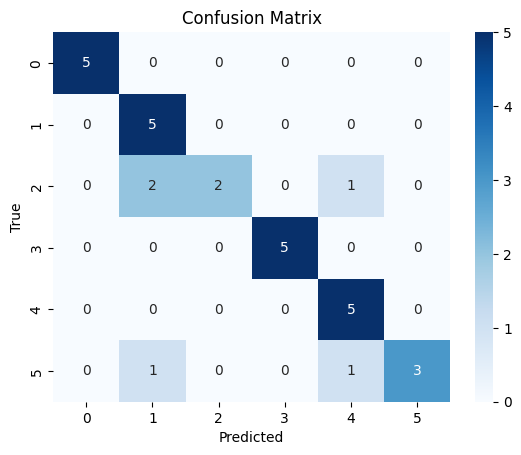

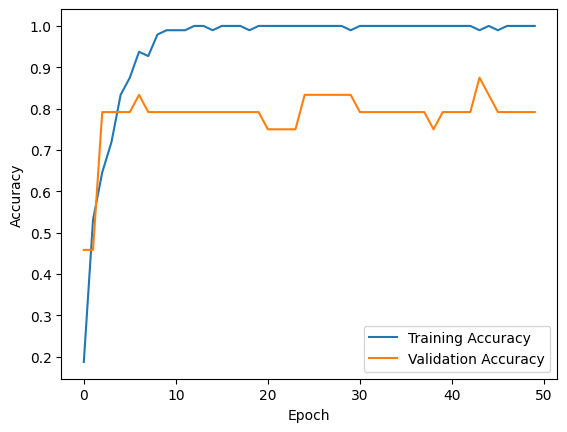

In [10]:


# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture with increased depth
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




/content/drive/MyDrive/neural_data/asha/Aage Bhi Jaane Na - Waqt (1965) 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaiye Meharban - Howrah Bridge 1958 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Ki Raat Koi Aane Ko Hai - Anamika 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Koi Pyar Se - Sawan Ki Ghata 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaj Qayamat Ho Gai - Qayamat 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaja Aaja Sanam Rakhi Aur Hathkadi 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Huzoor Tumko - Kismet 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Na Gale Lag Jao Na - Mere Jeevan Saathi 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aao Yaro Gao - Hawas 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Aaya Hai Mausam Suhana - Sati Pareeksha 1957 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Ab Jo Mile Hai To - Caravan 320 Kbps.csv
/content/drive/MyDrive/neural_data/asha/Ang Lag Ja

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.1927 - loss: 1.8792 - val_accuracy: 0.4167 - val_loss: 1.5866
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4206 - loss: 1.5277 - val_accuracy: 0.5000 - val_loss: 1.4170
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6302 - loss: 1.2419 - val_accuracy: 0.5833 - val_loss: 1.2422
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7617 - loss: 0.9642 - val_accuracy: 0.6667 - val_loss: 1.0799
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.8296 - val_accuracy: 0.7917 - val_loss: 0.8620
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9036 - loss: 0.5737 - val_accuracy: 0.8333 - val_loss: 0.6964
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8997 - loss: 0.4137 - val_accuracy: 0.7500 - val_loss: 0.7052
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9258 - loss: 0.2611 - val_accuracy: 0.7500 - val_loss: 0.8272
Epoch 9/50

Test Accuracy: 80.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


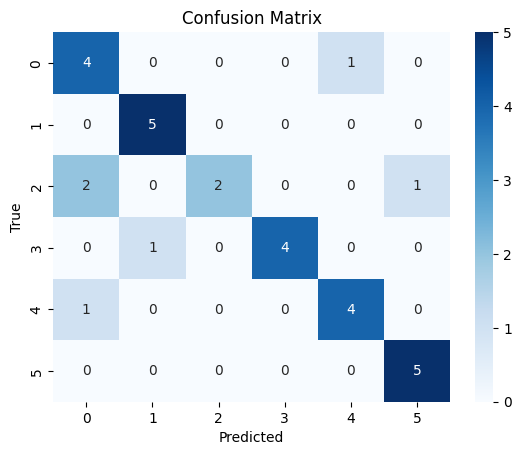

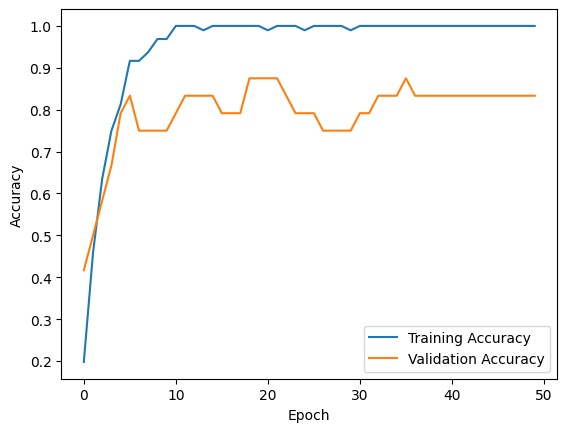

In [27]:
# Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load and process data with enhanced features
def load_mfcc_data(base_path, songs_per_folder=10):
    X, y = [], []
    folders = ['asha', 'bhaavgeet', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None).iloc[1:, :]  # Skip the first row
            print(file_path)


            # Extract features
            features = []
            for i in range(20):  # Assuming 20 MFCC coefficients
                mfcc_coeff = data.iloc[i, :].values
                features.extend([
                    np.mean(mfcc_coeff), np.var(mfcc_coeff), np.std(mfcc_coeff),
                    np.min(mfcc_coeff), np.max(mfcc_coeff), np.median(mfcc_coeff),
                    skew(mfcc_coeff), kurtosis(mfcc_coeff), np.sqrt(np.mean(mfcc_coeff**2)),
                    np.ptp(mfcc_coeff)
                ])

            X.append(features)
            y.append(label_dict[folder])

    return np.array(X), np.array(y)

# Load data
BASE_PATH = '/content/drive/MyDrive/neural_data'
X, y = load_mfcc_data(BASE_PATH, songs_per_folder=25)



# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture with increased depth
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






In [28]:
# New Prediction Folder
PREDICTION_PATH = '/content/drive/MyDrive/neural_data/MFCC-files-v2'  # Specify the path to the new MFCC files for prediction
pred_files = [f for f in os.listdir(PREDICTION_PATH) if f.endswith('.csv')]  # List of CSV files

# Load and process prediction files
for file in pred_files:
    file_path = os.path.join(PREDICTION_PATH, file)
    data = pd.read_csv(file_path, header=None)  # No skipping of first row

    # Extract features
    features = []
    for i in range(20):  # Assuming 20 MFCC coefficients
        mfcc_coeff = data.iloc[i, :].values
        features.extend([
            np.mean(mfcc_coeff), np.var(mfcc_coeff), np.std(mfcc_coeff),
            np.min(mfcc_coeff), np.max(mfcc_coeff), np.median(mfcc_coeff),
            skew(mfcc_coeff), kurtosis(mfcc_coeff), np.sqrt(np.mean(mfcc_coeff**2)),
            np.ptp(mfcc_coeff)
        ])

    # Scale the features
    features_scaled = scaler.transform([features])

    # Make prediction
    prediction = model.predict(features_scaled)
    predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted class label

    # Print the prediction result
    print(f"Prediction for {file}: {list(label_dict.keys())[list(label_dict.values()).index(predicted_label)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


NameError: name 'label_dict' is not defined

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.1901 - loss: 1.9321 - val_accuracy: 0.2917 - val_loss: 1.7081
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3815 - loss: 1.6218 - val_accuracy: 0.5417 - val_loss: 1.5541
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7266 - loss: 1.2979 - val_accuracy: 0.5417 - val_loss: 1.3925
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 1.0312 - val_accuracy: 0.5417 - val_loss: 1.2270
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7539 - loss: 0.8949 - val_accuracy: 0.5417 - val_loss: 1.1245
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8581 - loss: 0.5983 - val_accuracy: 0.5417 - val_loss: 1.0848
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8164 - loss: 0.4950 - val_accuracy: 0.5833 - val_loss: 1.1585
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8997 - loss: 0.3321 - val_accuracy: 0.5833 - val_loss: 1.2311
Epoch 9/50

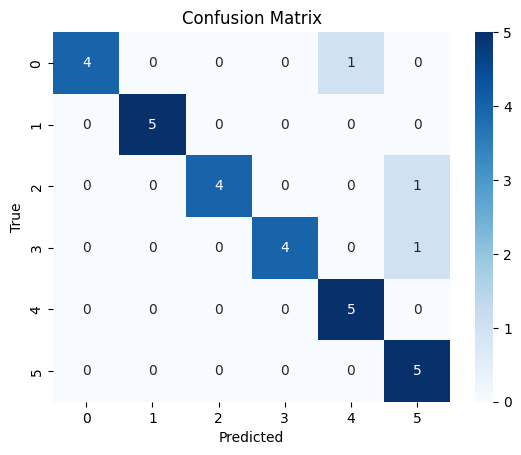

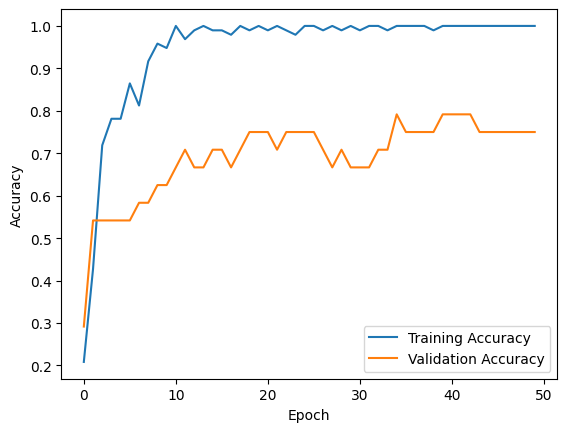

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Prediction for 73.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Prediction for 37.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for 1.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for 2.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for 104.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for 107.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 108.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for 11.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 112.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 113.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 13.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 14.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 16.csv: bhaavgeet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for 17.csv: bhaavgeet
1

In [29]:
# Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load and process data with enhanced features
def load_mfcc_data(base_path, songs_per_folder=10):
    X, y = [], []
    folders = ['asha', 'bhaavgeet', 'Jana Gana Mana', 'kk_mfcc', 'lavani', 'mj']
    label_dict = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files[:songs_per_folder]:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None)  # No skipping of first row

            # Extract features
            features = []
            for i in range(20):  # Assuming 20 MFCC coefficients
                mfcc_coeff = data.iloc[i, :].values
                features.extend([
                    np.mean(mfcc_coeff), np.var(mfcc_coeff), np.std(mfcc_coeff),
                    np.min(mfcc_coeff), np.max(mfcc_coeff), np.median(mfcc_coeff),
                    skew(mfcc_coeff), kurtosis(mfcc_coeff), np.sqrt(np.mean(mfcc_coeff**2)),
                    np.ptp(mfcc_coeff)
                ])

            X.append(features)
            y.append(label_dict[folder])

    return np.array(X), np.array(y), label_dict  # Return label_dict too

# Load data
BASE_PATH = '/content/drive/MyDrive/neural_data'
X, y, label_dict = load_mfcc_data(BASE_PATH, songs_per_folder=25)

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture with increased depth
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# New Prediction Folder
PREDICTION_PATH = '/content/drive/MyDrive/neural_data/MFCC-files-v2'  # Specify the path to the new MFCC files for prediction
pred_files = [f for f in os.listdir(PREDICTION_PATH) if f.endswith('.csv')]  # List of CSV files

# Load and process prediction files
for file in pred_files:
    file_path = os.path.join(PREDICTION_PATH, file)
    data = pd.read_csv(file_path, header=None)  # No skipping of first row

    # Extract features
    features = []
    for i in range(20):  # Assuming 20 MFCC coefficients
        mfcc_coeff = data.iloc[i, :].values
        features.extend([
            np.mean(mfcc_coeff), np.var(mfcc_coeff), np.std(mfcc_coeff),
            np.min(mfcc_coeff), np.max(mfcc_coeff), np.median(mfcc_coeff),
            skew(mfcc_coeff), kurtosis(mfcc_coeff), np.sqrt(np.mean(mfcc_coeff**2)),
            np.ptp(mfcc_coeff)
        ])

    # Scale the features
    features_scaled = scaler.transform([features])

    # Make prediction
    prediction = model.predict(features_scaled)
    predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted class label

    # Print the prediction result
    print(f"Prediction for {file}: {list(label_dict.keys())[list(label_dict.values()).index(predicted_label)]}")
